## Лабораторна робота №2: "Імплементація алгоритмів стиснення"

Склад команди та розподіл виконаних завдань:

-
-

Для кожного з алгоритмів поданих нижче
- опишіть як працює алгорит
- напишіть класи з методами encode та decode
- перевірте правильність кодування та декодування
- дослідіть час виконання коду в залежності від розмірів вхідних даних
- оцініть ступінь стиснення(у відсотка) в залежності від розмірів
- напишіть висновок про ефективність різних алгоритмів та умови за яких той чи інший алгоритм дають кращий результат

# Алгоритм Гаффмана

В цьому алгоритмі доцільно імплементувати клас node та додаткові функції в Huffman для побудови дерева кодування

In [25]:
class Node:
    def __init__(self, weight, value=None, left_son=None, right_son=None):
        self.weight = weight
        self.value = value
        self.left_son = left_son
        self.right_son = right_son

    def is_leaf(self):
        return not (self.left_son or self.right_son)

    def __repr__(self):
        return f"Node({self.value}, {self.weight})"


class Huffman:
    def build_tree(self, text):
        characters = sorted(set(text), key = lambda x: text.count(x))
        nodes = [Node(value = char, weight = text.count(char)) for char in characters]
        while len(nodes) > 1:
            left = nodes.pop(0)
            right = nodes.pop(0)
            parent = Node(weight=left.weight + right.weight, left_son=left, right_son=right)
            nodes.append(parent)
            nodes = sorted(nodes, key=lambda x: x.weight)
        # print(nodes[0])
        return nodes[0]

    def generate_codes(self, node, code="", code_dct=None):
        if code_dct is None:
            code_dct = {}
        if node.is_leaf():
            code_dct = {node.value : "0"}
        while not node.is_leaf():
            current_node = node
            code = ""
            while True:
                if current_node.left_son:
                    code += "0"
                    prev_node = current_node
                    current_node = current_node.left_son
                elif current_node.right_son:
                    code += "1"
                    prev_node = current_node
                    current_node = current_node.right_son
                elif current_node.is_leaf():
                    if current_node.value:
                        code_dct[current_node.value] = code
                    if code[-1] == "0":
                        prev_node.left_son = None
                    else:
                        prev_node.right_son = None
                    break
        return code_dct

    def encode(self, text):
        huffman_tree = self.build_tree(text)
        code_dict = self.generate_codes(huffman_tree)
        encoded_text = "".join(code_dict[char] for char in text)
        return encoded_text, code_dict

    def decode(self, encoded_text, code_dict):
        decode_dict = {code: char for char, code in code_dict.items()}
        decoded_text = ""
        code = ""
        for bit in encoded_text:
            code += bit
            if code in decode_dict:
                decoded_text += decode_dict[code]
                code = ""
        return decoded_text

huffman = Huffman()
text = "ftesudryfuglihvlfuygu;hgldtuoylig;uhvlfutytgfgDTORYTU:gflurtugskvdgdvuotufyfygiuhojouyfutydrertuygihojougyft"
encoded_text, code_dict = huffman.encode(text)
decoded_text = huffman.decode(encoded_text, code_dict)

print("Original text:", text)
# print("Encoded text:", encoded_text)
print("Decoded text:", text == decoded_text)
print(f"{len(text)*8 = }")
print(f"{len(encoded_text) = }")
len(encoded_text)/ (len(text)*8)
assert text == decoded_text

Original text: ftesudryfuglihvlfuygu;hgldtuoylig;uhvlfutytgfgDTORYTU:gflurtugskvdgdvuotufyfygiuhojouyfutydrertuygihojougyft
Decoded text: True
len(text)*8 = 864
len(encoded_text) = 444


# Алгоритм LZW

In [26]:
"""Module for lzw"""
class LZW:
    """class for lzw"""

    @staticmethod
    def encode(data: str):
        """LZW encoding method

        Args:
            data (str): input string

        Returns:
            list: encoded string in list of numbers
            dict: temporary dictionary for decoding
        """
        dct = {}
        num = 0
        for i in data:
            if i not in dct:
                dct[i] = num
                num += 1
        enc_data = []
        dct_decode_temp = dct.copy()
        string = ""
        for char in data:
            if string + char in dct:
                string += char
            else:
                enc_data.append(dct[string])
                dct[string + char] = num
                num += 1
                string = char
        if string:
            enc_data.append(dct[string])
        dct_decode_temp = {value: i for i, value in dct_decode_temp.items()}
        return enc_data, dct_decode_temp

    @staticmethod
    def decode(enc_data, dct_decode_temp):
        """Decoding method for LZW

        Args:
            enc_data (list): list of numbers (encoded message)
            dct_decode_temp (dict): temporary dictionary

        Returns:
            str: decoded message
        """
        dec_data = ""
        prev_code = enc_data[0]
        dec_data += dct_decode_temp[prev_code]
        for code in enc_data[1:]:
            if code in dct_decode_temp:
                current_string = dct_decode_temp[code]
                dec_data += current_string
                new_entry = dct_decode_temp[prev_code] + current_string[0]
                dct_decode_temp[max(dct_decode_temp.keys()) + 1] = new_entry
            else:
                current_string = dct_decode_temp[prev_code] + dct_decode_temp[prev_code][0]
                dec_data += current_string
                dct_decode_temp[max(dct_decode_temp.keys()) + 1] = current_string
            prev_code = code
        return dec_data




INPUT_DATA = "temporary used items"
encoded_data, decode_dict = LZW.encode(INPUT_DATA)
print("Encoded:", encoded_data, decode_dict)
decoded_data = LZW.decode(encoded_data, decode_dict)
print("Decoded:", decoded_data)
INPUT_DATA = "abacabacabadafbad"
encoded_data, decode_dict = LZW.encode(INPUT_DATA)
print("Encoded:", encoded_data, decode_dict)
decoded_data = LZW.decode(encoded_data, decode_dict)
print("Decoded:", decoded_data)
INPUT_DATA = "Lorem ipsum dolor sit amet consectetur \
adipisicing elit. Magnam odio amet modi illum esse, nesciunt dicta earum dolorem. Corrupti, dolorem voluptates! Itaque, necessitatibus inventore \
voluptates aut eaque praesentium nostrum dolor?"
encoded_data, decode_dict = LZW.encode(INPUT_DATA)
print("Encoded:", encoded_data, decode_dict)
decoded_data = LZW.decode(encoded_data, decode_dict)
print("Decoded:", decoded_data)
assert decoded_data == INPUT_DATA

Encoded: [0, 1, 2, 3, 4, 5, 6, 5, 7, 8, 9, 10, 1, 11, 8, 12, 13, 2, 10] {0: 't', 1: 'e', 2: 'm', 3: 'p', 4: 'o', 5: 'r', 6: 'a', 7: 'y', 8: ' ', 9: 'u', 10: 's', 11: 'd', 12: 'i'}
Decoded: temporary used items
Encoded: [0, 1, 0, 2, 5, 7, 9, 3, 0, 4, 6, 3] {0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'f'}
Decoded: abacabacabadafbad
Encoded: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 31, 10, 1, 11, 28, 5, 8, 6, 12, 5, 13, 4, 3, 45, 14, 1, 15, 8, 3, 14, 12, 49, 9, 2, 46, 10, 33, 6, 43, 14, 6, 15, 16, 5, 3, 11, 44, 17, 5, 18, 13, 16, 15, 47, 5, 1, 62, 1, 46, 48, 45, 4, 82, 6, 32, 11, 11, 36, 70, 8, 54, 19, 5, 15, 3, 8, 66, 9, 15, 45, 62, 56, 13, 70, 13, 2, 94, 38, 40, 29, 4, 74, 20, 28, 112, 7, 12, 6, 98, 114, 28, 30, 5, 21, 39, 9, 122, 13, 57, 8, 22, 5, 23, 12, 13, 24, 9, 3, 98, 100, 14, 101, 43, 140, 123, 25, 9, 8, 32, 15, 21, 3, 105, 127, 129, 131, 133, 135, 46, 9, 45, 3, 141, 143, 5, 7, 2, 13, 101, 158, 123, 94, 15, 1, 8, 12, 112, 37, 39, 28, 26] {0: 'L', 1: 'o', 2: 'r', 3: 'e', 4: 'm', 5: ' ', 6: 'i', 7: 

# Алгоритм LZ77

Потрібно заміряти розміри саме тексту, проте для роботи доцільно використовувати список тюплів, тому для зручності варто імплементувати додаткові алгоритми _text2list та _list2text

In [5]:
class LZ77:
    def __init__(self, buffer_size: int=5):
        self.buffer_size = buffer_size

    def _text2list(self, txt: str) -> list:
        """Converts text to list"""
        return list(txt)
    
    def _list2text(self, lst: list) -> str:
        """Converts list to text"""
        return "".join(str(tpl) for tpl in lst)

    def encode(self, text: str) -> list:
        lst = [None]* self.buffer_size + self._text2list(text)
        encoded = []
        while len(lst) > self.buffer_size:
            poss_output = []
            search_buffer = lst[:self.buffer_size]
            after_window = lst[self.buffer_size:]
            for ind, buf_char in enumerate(search_buffer, -len(search_buffer)):
                if buf_char != after_window[0]:
                    o = 0
                    l = 0
                    c = after_window[0]
                    poss_output.append((o,l,c))
                else:

                    for leng, char in enumerate(after_window, start=0):
                        if char != lst[self.buffer_size + ind + leng]:
                            o = -ind
                            l = leng
                            c = lst[self.buffer_size + leng]
                            poss_output.append((o,l,c))
                            break
                        else:
                            o = -ind
                            l = leng + 1
                            c = lst[self.buffer_size + ind + l + 2]# + "*"
                            poss_output.append((o,l,c))

            encoded.append(max(poss_output, key=lambda x: x[1]))
            for _ in range(encoded[-1][1]+1):
                lst.pop(0)

        return encoded

    def decode(self, code: list) -> str:
        decoded = []
        for o, l, c in code:
            if o == 0:
                decoded.append(c)
            else:
                start_index = -o
                end_index = l - o
                if self.buffer_size > len(decoded) < l:
                    decoded += decoded[-o:] * (l//o) + decoded[-o:l%o] #+ [c]
                elif end_index < 0:
                    decoded += decoded[start_index:end_index]
                    decoded.append(c)
                    
                else:
                    decoded += decoded[-self.buffer_size:] * (l//self.buffer_size)
                    decoded += decoded[-self.buffer_size:-self.buffer_size + l%self.buffer_size] #+ [c]
        print(len(decoded))
        return self._list2text(decoded)

# Example usage:
lz77 = LZ77()
with open("/home/garuda_enjoyer/Desktop/projects/dicr_math/Lab_2/sample3.txt", "r", encoding = "utf-8") as file:
    text = file.read()

encoded = lz77.encode(text)
print("Encoded:", encoded)
decoded = lz77.decode(encoded)
print("Decoded:", decoded)
print(decoded == text)
print(len(decoded), len(text))

[(0, 0, 'a'), (0, 0, 'a'), (0, 0, 'a'), (0, 0, 'a'), (0, 0, 'a')]
[None, None, None, None, None]
['a', 'h', 'v', 's', 'd', 'h', 'v', 'a', 'h', 's', 'b', 'b', 'a', 'b', 'a', 'b', 'b', 'a', 's', 'b', 'h', 'a', 'b', 'b', 'b', 'a', 's', 'b', 'h', 'a', 'b', 'h', 's', 'b', 'h', 'a', 's', 'b', 'a', 'b', 'b', 'b', 'a', 'b', 'b', 'a', 'b', 'b', 'b', 'a', 'b', 'a', 'h', 's', 'b', 'a', 's']
[(0, 0, 'a')]
[(0, 0, 'h'), (0, 0, 'h'), (0, 0, 'h'), (0, 0, 'h'), (0, 0, 'h')]
[None, None, None, None, 'a']
['h', 'v', 's', 'd', 'h', 'v', 'a', 'h', 's', 'b', 'b', 'a', 'b', 'a', 'b', 'b', 'a', 's', 'b', 'h', 'a', 'b', 'b', 'b', 'a', 's', 'b', 'h', 'a', 'b', 'h', 's', 'b', 'h', 'a', 's', 'b', 'a', 'b', 'b', 'b', 'a', 'b', 'b', 'a', 'b', 'b', 'b', 'a', 'b', 'a', 'h', 's', 'b', 'a', 's']
[(0, 0, 'a'), (0, 0, 'h')]
[(0, 0, 'v'), (0, 0, 'v'), (0, 0, 'v'), (0, 0, 'v'), (0, 0, 'v')]
[None, None, None, 'a', 'h']
['v', 's', 'd', 'h', 'v', 'a', 'h', 's', 'b', 'b', 'a', 'b', 'a', 'b', 'b', 'a', 's', 'b', 'h', 'a', 'b'

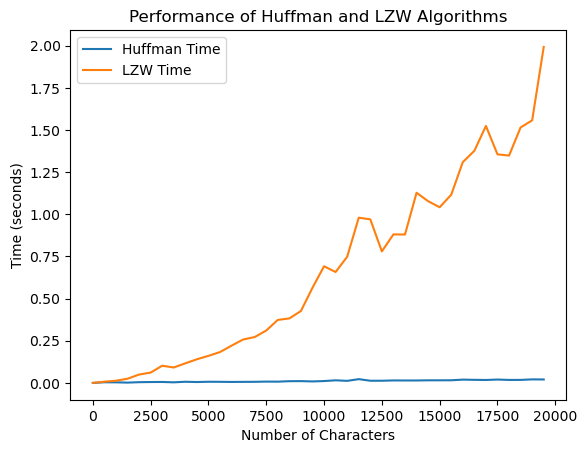

In [21]:
import random
import time
import matplotlib.pyplot as plt

huffman = Huffman()
def huffman_encode(text):
    global code_dict
    start_encode = time.time()
    encoded_text, code_dict = huffman.encode(text)

    end_encode = time.time()
    encode_time = end_encode - start_encode
    return encoded_text, encode_time

def huffman_decode(encoded_text):
    start_decode = time.time()
    decoded_text = huffman.decode(encoded_text, code_dict)    
    end_decode = time.time()
    decode_time = end_decode - start_decode
    return decoded_text, decode_time

def lzw_encode(text):
    global decode_dict2
    start_encode = time.time()
    encoded_text, decode_dict2 = LZW.encode(text)
    end_encode = time.time()
    encode_time = end_encode - start_encode
    return encoded_text, encode_time

def lzw_decode(encoded_text):
    start_decode = time.time()
    decoded_text = LZW.decode(encoded_text, decode_dict2)
    end_decode = time.time()
    decode_time = end_decode - start_decode
    return decoded_text, decode_time

def plot_performance(lengths):
    huffman_encode_times = []
    huffman_decode_times = []
    lzw_encode_times = []
    lzw_decode_times = []

    for length in lengths:
        text = generate_random_string(length)

        huffman_encoded_text, huffman_encode_time = huffman_encode(text)
        huffman_decoded_text, huffman_decode_time = huffman_decode(huffman_encoded_text)
        huffman_encode_times.append(huffman_encode_time + huffman_decode_time)
        # huffman_decode_times.append(huffman_decode_time)

        lzw_encoded_text, lzw_encode_time = lzw_encode(text)
        lzw_decoded_text, lzw_decode_time = lzw_decode(lzw_encoded_text)
        lzw_encode_times.append(lzw_encode_time + lzw_decode_time)
        # lzw_decode_times.append(lzw_decode_time)

    plt.plot(lengths, huffman_encode_times, label='Huffman Time')
    # plt.plot(lengths, huffman_decode_times, label='Huffman  Time')
    plt.plot(lengths, lzw_encode_times, label='LZW Time')
    # plt.plot(lengths, lzw_decode_times, label='LZW Decoding Time')
    plt.xlabel('Number of Characters')
    plt.ylabel('Time (seconds)')
    plt.title('Performance of Huffman and LZW Algorithms')
    plt.legend()
    plt.show()

def generate_random_string(length):
    characters = [chr(random.randint(32, 126)) for _ in range(length)]
    return ''.join(characters)

if __name__ == "__main__":
    lengths = list(range(1, 20001, 500))
    plot_performance(lengths)

    


In [ ]:
Можна зробити висновок, що гаффман набагато ефективніший за лзв

# Алгоритм Deflate

In [ ]:
class Deflate:
    def __init__(self, buffer_size: int):
        pass

    def encode(self, text: str) -> str:
        pass

    def decode(self, code: str) -> str:
        pass